In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from fitter import Fitter

In [2]:
# Some defaults for beautiful plots
%matplotlib inline
sns.set()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))

### Load Data

In [3]:
raw_data = pd.read_csv("gcTrianingSet.csv")
raw_data[:5]

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
0,4.249634,2.999878,token_1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798
1,4.409720,2.839792,token_2,False,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151
2,4.482361,2.767151,token_3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886
3,4.542626,2.706886,token_4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218
4,4.616296,2.633216,token_5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339


In [4]:
pred_data = pd.read_csv("gcPredictionFile.csv")
pred_data[:5]

,initialUsedMemory,initialFreeMemory,query token,cpuTimeTaken,gcRun
0,4.247186,2.774299,token_11,0.408436,NaN
1,NaN,NaN,token_76,0.124429,NaN
2,NaN,NaN,token_53,0.245838,NaN
3,NaN,NaN,token_88,0.169346,NaN
4,NaN,NaN,token_70,0.296311,NaN


### Are there any tokens in test file which are not present in training file

In [5]:
train_token_set = set(raw_data['query token'].tolist())
pred_token_set = set(pred_data['query token'].tolist())

unknown_tokens = train_token_set - pred_token_set
len(unknown_tokens)

0

Cool.

### Check if initialUsedMemory and initialFreeMemory add up

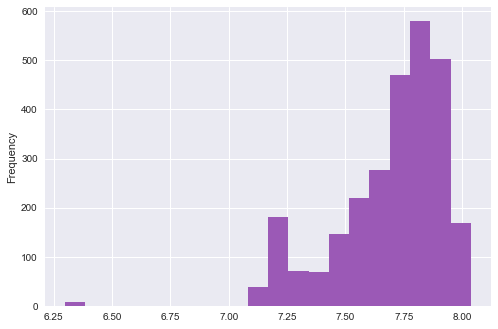

In [26]:
data = raw_data.copy()

data["gcMemoryReleased"] = data["gcInitialMemory"] - data['gcFinalMemory']

data['tokenId'] = pd.to_numeric(data['query token'].str.split("_").str[1])

data['initialTotalMemory'] = data['initialUsedMemory'] + data['initialFreeMemory']

data['initialTotalMemory'].plot.hist(bins=20)

For some crazy reason the total memory changes over time. And the change is pretty significant to ignore. Let's check final memory usage.

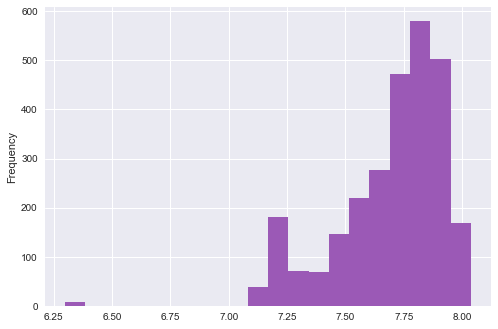

In [51]:
data['finalTotalMemory'] = data['finalUsedMemory'] + data['finalFreeMemory']

data['finalTotalMemory'].plot.hist(bins=20)

In [53]:
f = Fitter(data['finalTotalMemory'].tolist())
f.fit()

Fitted alpha distribution with error=35.2707543973)
Fitted anglit distribution with error=69.6487594022)
Fitted arcsine distribution with error=88.3023535499)
Fitted beta distribution with error=22.5129171352)
Fitted betaprime distribution with error=49.0468217144)
Fitted bradford distribution with error=92.9731270594)
Fitted burr distribution with error=19.0878540609)
Fitted burr12 distribution with error=22.4967396326)
Fitted cauchy distribution with error=27.9127340528)
Fitted chi distribution with error=34.7732931168)
Fitted chi2 distribution with error=36.3837682684)
Fitted cosine distribution with error=110.771635584)
Fitted dgamma distribution with error=24.3112439653)
Fitted dweibull distribution with error=25.2081176905)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1000000000000001.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0666666666666664.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0499999999999998.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0166666666666666.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.524797770919089.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.4772000474149833.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.4809713417878552.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.4826107439174603.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.887617799218162.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.549173729617694.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.556061442006332.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.043196524499546.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 43.435211497903424.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 43.959660710296802.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 45.747587328356396.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 46.719942498436282.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 87.164857657343191.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 86.845438948181766.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 93.880291142990899.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 99.060986706012216.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 153.09613284762105.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 155.69429397290833.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 159.63372427345851.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 161.22637183872627.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 294.97115197569303.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 271.831921066517.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 281.01593440499062.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 290.88389432455926.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution 

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 418.37019308577533.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 398.89939698059754.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 416.40609705360646.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 426.51729789097794.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 556.38121169486067.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 561.80541936105521.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 570.12494019762403.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 549.34553981526301.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

Fitted erlang distribution with error=35.3001975795)
Fitted expon distribution with error=98.9123606048)
Fitted exponnorm distribution with error=33.9022119159)
Fitted exponpow distribution with error=20.9949249388)
Fitted exponweib distribution with error=20.8702970699)
Fitted f distribution with error=33.9647936879)
Fitted fatiguelife distribution with error=33.92911228)
Fitted fisk distribution with error=29.6561199745)
Fitted foldcauchy distribution with error=27.9224867577)
Fitted foldnorm distribution with error=33.9684339661)
Fitted frechet_l distribution with error=24.6243619808)
Fitted frechet_r distribution with error=22.4452744956)
Fitted gamma distribution with error=36.7162781651)
Fitted gausshyper distribution with error=65.6711311709)
Fitted genexpon distribution with error=75.2413316037)
Fitted genextreme distribution with error=24.6246663655)
Fitted gengamma distribution with error=27.4951185164)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2216: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2217: RuntimeWarning: invalid value encountered in multiply
  tmp2 = tmp0*tmp


Fitted genhalflogistic distribution with error=52.5931587532)
Fitted genlogistic distribution with error=19.084503742)
Fitted gennorm distribution with error=29.6621018261)
Fitted genpareto distribution with error=90.6824031691)
Fitted gilbrat distribution with error=90.9620525497)
Fitted gompertz distribution with error=22.5263573914)
Fitted gumbel_l distribution with error=22.5226060534)
Fitted gumbel_r distribution with error=49.2409421919)
Fitted halfcauchy distribution with error=95.9584174994)
Fitted halfgennorm distribution with error=77.7816837699)
Fitted halflogistic distribution with error=92.9650128444)
Fitted halfnorm distribution with error=92.0577683157)
Fitted hypsecant distribution with error=28.0774071342)
Fitted invgamma distribution with error=34.8003358915)
Fitted invgauss distribution with error=38.3100046898)
Fitted invweibull distribution with error=49.2452186453)
Fitted johnsonsb distribution with error=21.4272434147)
Fitted johnsonsu distribution with error=21.

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3658: RuntimeWarning: overflow encountered in double_scalars
  return 2*nu**nu/gam(nu)*(x**(2*nu-1.0))*exp(-nu*x*x)


Fitted nakagami distribution with error=34.5559668848)
Fitted ncf distribution with error=61.5329627383)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3883: RuntimeWarning: overflow encountered in multiply
  trm1 = sqrt(2)*nc*x*special.hyp1f1(n/2+1, 1.5, valF)


Fitted nct distribution with error=49.938940113)
Fitted ncx2 distribution with error=36.1255605913)
Fitted norm distribution with error=33.9046044129)
Fitted pareto distribution with error=102.076289015)
Fitted pearson3 distribution with error=22.4883039923)
Fitted powerlaw distribution with error=66.6689189333)
Fitted powerlognorm distribution with error=25.4965908839)
Fitted powernorm distribution with error=23.794887795)
Fitted rayleigh distribution with error=75.0569091185)
Fitted rdist distribution with error=84.3127982368)
Fitted recipinvgauss distribution with error=35.2863578436)
Fitted reciprocal distribution with error=110.771635584)
Fitted rice distribution with error=33.9037304505)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=76.4287719329)
Fitted skewnorm distribution with error=22.5540431457)
Fitted t distribution with error=28.5809321012)
Fitted trapz distribution with error=55.9537348437)
Fitted triang dist

,sumsquare_error
genlogistic,19.084504
burr,19.087854
mielke,19.162965
loggamma,20.579226
exponweib,20.870297


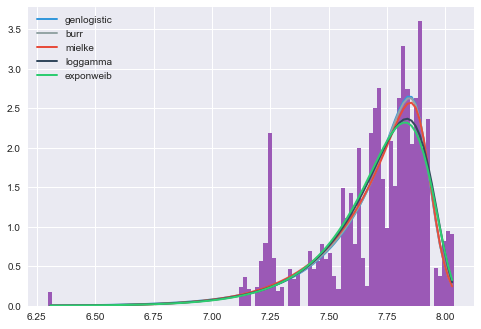

In [54]:
f.summary()

At least they match up.

### Distribution of memory utilization

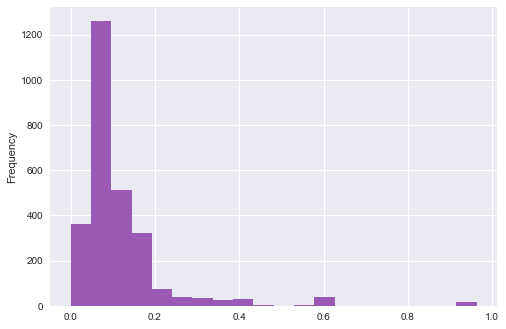

In [8]:
for idx, row in data.iterrows():
    if row['gcRun']:
        memoryUsed = row['gcInitialMemory'] - row['initialUsedMemory'] 
    else:
        memoryUsed = row['finalUsedMemory'] - row['initialUsedMemory']

    data.set_value(idx, 'memoryUsed', memoryUsed)

data['memoryUsed'].plot.hist(bins=20)

The negative final memory must be the rows where gc was run.

### Seperate the rows with gc run

In [29]:
data_gc_true = data[(data['gcRun'] == True)]

print(data_gc_true.shape[0])

data_gc_true[:5]

171


,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,gcMemoryReleased,tokenId,initialTotalMemory
7,4.977155,2.272357,token_8,True,5.055250,4.142316,7.249512,0.19,0.00,0.07,0.154474,4.168083,3.081428,0.912934,8,7.249512
14,5.050119,2.199393,token_15,True,5.120831,4.137337,7.249512,0.17,0.01,0.03,0.275411,4.239779,3.009732,0.983495,15,7.249512
22,5.045302,2.204210,token_23,True,5.115852,4.132132,7.249512,0.17,0.00,0.02,0.592555,4.656779,2.592733,0.983721,23,7.249512
29,5.065997,2.183514,token_30,True,5.110647,4.115836,7.249512,0.13,0.00,0.02,0.119891,4.149363,3.100148,0.994811,30,7.249512
38,5.069745,2.179767,token_39,True,5.094352,4.103097,7.249512,0.09,0.00,0.01,0.133800,4.142371,3.107140,0.991255,39,7.249512


In [48]:
data_gc_false = data[(data['gcRun'] != True)]

print(data_gc_false.shape[0])

data_gc_false

2559


,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,gcMemoryReleased,tokenId,initialTotalMemory
0,4.249634,2.999878,token_1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798,0.0,1,7.249512
1,4.409720,2.839792,token_2,False,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151,0.0,2,7.249512
2,4.482361,2.767151,token_3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886,0.0,3,7.249512
3,4.542626,2.706886,token_4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218,0.0,4,7.249512
4,4.616296,2.633216,token_5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339,0.0,5,7.249512
5,4.787174,2.462337,token_6,False,0.0,0.0,0.0,0.0,0.0,0.0,0.170063,4.902623,2.346889,0.0,6,7.249512
6,4.902623,2.346889,token_7,False,0.0,0.0,0.0,0.0,0.0,0.0,0.164785,4.977153,2.272359,0.0,7,7.249512
8,4.171586,3.077926,token_9,False,0.0,0.0,0.0,0.0,0.0,0.0,0.457611,4.520573,2.728938,0.0,9,7.249512
9,4.523625,2.725887,token_10,False,0.0,0.0,0.0,0.0,0.0,0.0,0.182251,4.621179,2.628333,0.0,10,7.249512
10,4.621179,2.628333,token_11,False,0.0,0.0,0.0,0.0,0.0,0.0,0.190840,4.720848,2.528664,0.0,11,7.249512


### Let's plot the distruibution again

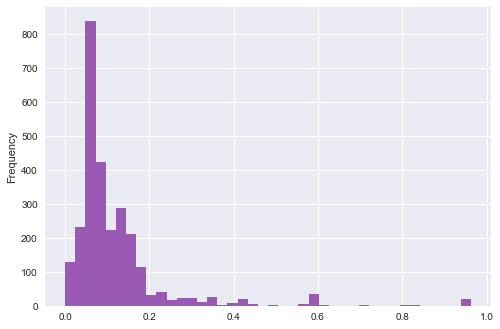

In [11]:
data['memoryUsed'].plot.hist(bins=40)

### Where gc has been run

0.121065411567
0.153433230188


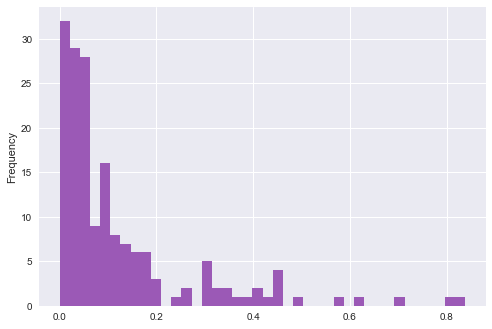

In [12]:
data_gc_true['memoryUsed'].plot.hist(bins=40)
print(data_gc_true['memoryUsed'].mean())
print(data_gc_true['memoryUsed'].std())

### Where gc has not been run

0.115898752987
0.116389402738


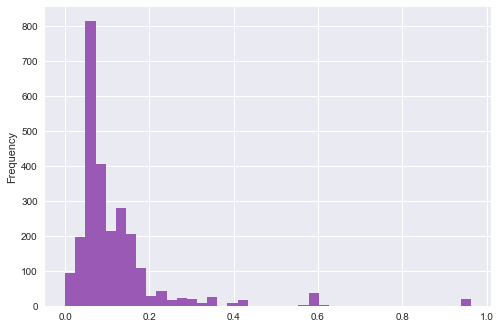

In [13]:
data_gc_false['memoryUsed'].plot.hist(bins=40)
print(data_gc_false['memoryUsed'].mean())
print(data_gc_false['memoryUsed'].std())

The distribution 

### Distribution of queries

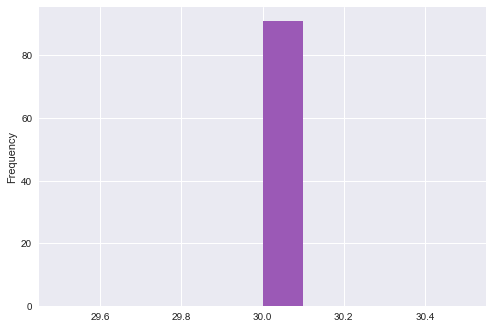

In [14]:
data['query token'].value_counts().plot.hist()

Cool. Equal numver of samples for all tokens.

### The zero feilds

gcInitialMemory, gcFinalMemory, gcTotalMemory, userTime, sysTime, realTime all seem to be always zero when gc is not run. Let's verify.

In [15]:
print(data_gc_false[data_gc_false['gcInitialMemory'] != 0].shape[0])
print(data_gc_false[data_gc_false['gcFinalMemory'] != 0].shape[0])
print(data_gc_false[data_gc_false['gcTotalMemory'] != 0].shape[0])
print(data_gc_false[data_gc_false['userTime'] != 0].shape[0])
print(data_gc_false[data_gc_false['sysTime'] != 0].shape[0])
print(data_gc_false[data_gc_false['realTime'] != 0].shape[0])

0
0
0
0
0
0


I am not really able to understand what it gcInitialMemory, gcFinalMemory and gcTotalMemory mean. 

### Correlation between memoryUsed and query token

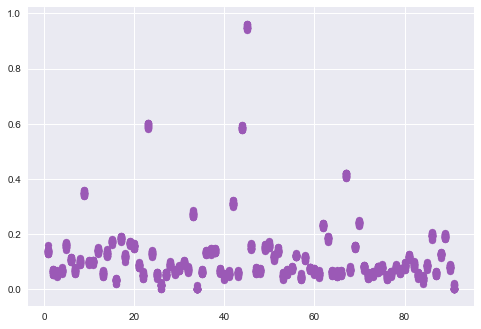

In [16]:
plt.scatter(data_gc_false['tokenId'], data_gc_false['memoryUsed'])

Looks pretty good.

#### Plotting mean and standard deviation

In [17]:
token_ids = data['tokenId'].unique()

tokens = []

for token_id in token_ids:
    token = {}
    token['tokenId'] = token_id
    token['memoryUsed'] = data[data['tokenId'] == token_id]['memoryUsed'].tolist()
    token['memoryUsedStd'] = data[data['tokenId'] == token_id]['memoryUsed'].std()
    token['memoryUsedMean'] = data[data['tokenId'] == token_id]['memoryUsed'].mean()
    tokens.append(token)

tokens = pd.DataFrame(tokens)
tokens[:5]

,memoryUsed,memoryUsedMean,memoryUsedStd,tokenId
0,"[0.160079777, 0.137227587, 0.130947031, 0.1378...",0.129826,0.027485,1
1,"[0.072641141, 0.058259994, 0.061375066, 0.0649...",0.061850,0.006729,2
2,"[0.0602647, 0.052549176, 0.05311203, 0.0598747...",0.055497,0.006367,3
3,"[0.073667571, 0.071119912, 0.061491832, 0.0671...",0.063172,0.011585,4
4,"[0.17087698, 0.161040262, 0.147934034, 0.15330...",0.156738,0.010048,5


0.0217721859626


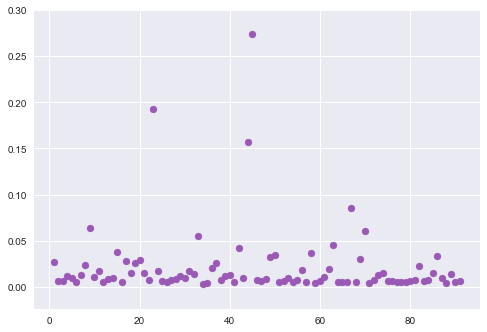

In [18]:
plt.scatter(tokens['tokenId'], tokens['memoryUsedStd'])
print(tokens['memoryUsedStd'].mean())

Standard deviation is very low. This is nice.

0.116222378855


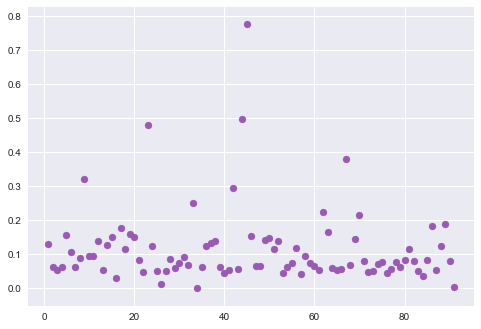

In [19]:
plt.scatter(tokens['tokenId'], tokens['memoryUsedMean'])
print(tokens['memoryUsedMean'].mean())

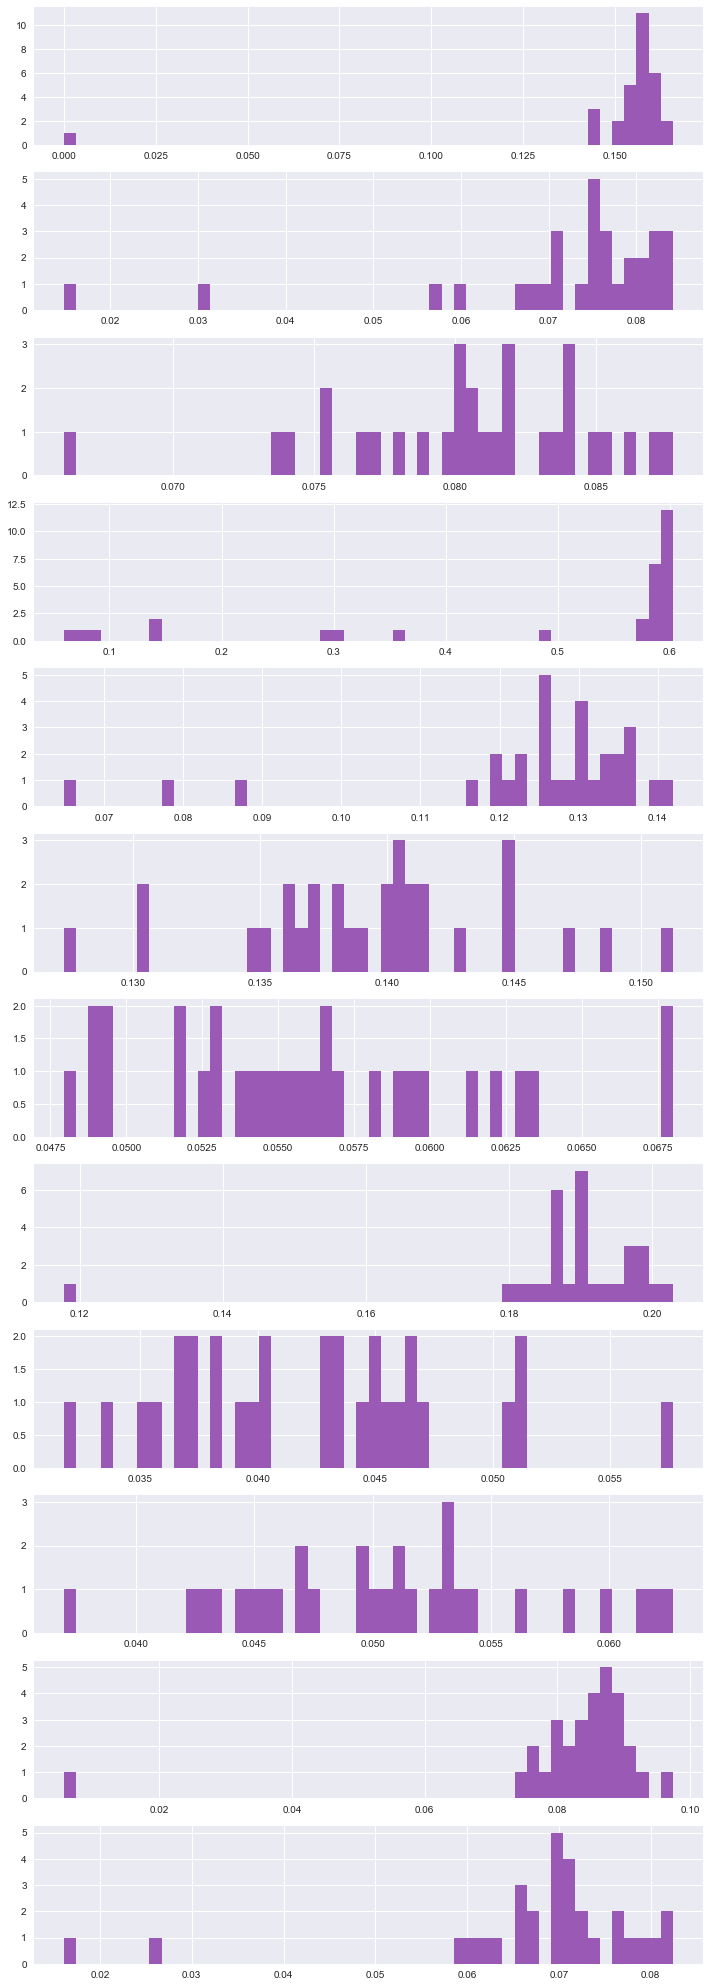

In [20]:
f, axarr = plt.subplots(12, figsize=(12, 36))

for ax in axarr:
    ax.hist(tokens.sample()['memoryUsed'].tolist(), bins=50)

In [21]:
dists = {}
for _, token in tokens.iterrows():
    try:         
        f = Fitter(token['memoryUsed'])
        # Based on brute force
        f.distributions = ["dgamma", "dweibull", "foldcauchy", "vonmises_line"]
        f.fit()
        best_fit_dist = f.get_best().keys()[0]
        dists[best_fit_dist] = dists.get(best_fit_dist, 0) + 1
    except:
        pass

Fitted dgamma distribution with error=18880.6863558)
Fitted dweibull distribution with error=19828.0463696)
Fitted foldcauchy distribution with error=21041.7649744)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted vonmises_line distribution with error=47484.0824446)
Fitted dgamma distribution with error=439785.810944)
Fitted dweibull distribution with error=440302.15512)
Fitted foldcauchy distribution with error=463912.859641)


/usr/local/lib/python2.7/dist-packages/fitter/fitter.py:286: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  name = self.df_errors.sort('sumsquare_error').iloc[0].name


Fitted vonmises_line distribution with error=462305.305519)
Fitted dgamma distribution with error=729397.105425)
Fitted dweibull distribution with error=704406.800499)
Fitted foldcauchy distribution with error=735576.108482)
Fitted vonmises_line distribution with error=705640.130995)
Fitted dgamma distribution with error=115017.135433)
Fitted dweibull distribution with error=119627.134521)
Fitted foldcauchy distribution with error=117923.640616)
Fitted vonmises_line distribution with error=185615.261828)
Fitted dgamma distribution with error=118163.026441)
Fitted dweibull distribution with error=119584.656768)
Fitted foldcauchy distribution with error=121201.786603)
Fitted vonmises_line distribution with error=189730.100594)
Fitted dgamma distribution with error=1555079.74005)
Fitted dweibull distribution with error=1627517.68697)
Fitted foldcauchy distribution with error=1637919.56583)
Fitted vonmises_line distribution with error=1599905.13609)
Fitted dgamma distribution with error=92

Fitted vonmises_line distribution with error=181954.038124)
Fitted dgamma distribution with error=59179.0727076)
Fitted dweibull distribution with error=59828.1787485)
Fitted foldcauchy distribution with error=109814.077381)
Fitted vonmises_line distribution with error=137498.286238)
Fitted dgamma distribution with error=490617.95168)
Fitted dweibull distribution with error=500483.653554)
Fitted foldcauchy distribution with error=521812.39435)
Fitted vonmises_line distribution with error=774203.044855)
Fitted dgamma distribution with error=19393.5636584)
Fitted dweibull distribution with error=26502.5909228)
Fitted foldcauchy distribution with error=15078.5174224)
Fitted vonmises_line distribution with error=38875.3831613)
Fitted dgamma distribution with error=112340.834863)
Fitted dweibull distribution with error=109139.473072)
Fitted foldcauchy distribution with error=138298.915638)
Fitted vonmises_line distribution with error=239165.196925)
Fitted dgamma distribution with error=2287

Fitted vonmises_line distribution with error=591159.414096)
Fitted dgamma distribution with error=747082.409939)
Fitted dweibull distribution with error=755903.374393)
Fitted foldcauchy distribution with error=800110.208294)
Fitted vonmises_line distribution with error=787996.211285)
Fitted dgamma distribution with error=318325.1687)
Fitted dweibull distribution with error=319754.453987)
Fitted foldcauchy distribution with error=322474.110349)
Fitted vonmises_line distribution with error=514090.282346)
Fitted dgamma distribution with error=477225.225053)
Fitted dweibull distribution with error=479060.936438)
Fitted foldcauchy distribution with error=483890.417897)
Fitted vonmises_line distribution with error=745045.962307)
Fitted dgamma distribution with error=336599.343195)
Fitted dweibull distribution with error=337953.817668)
Fitted foldcauchy distribution with error=336729.071418)
Fitted vonmises_line distribution with error=336465.492079)
Fitted dgamma distribution with error=2761

In [22]:
dists

{'dgamma': 50, 'dweibull': 17, 'foldcauchy': 20, 'vonmises_line': 4}

dgamma seems to be the best fit.

### Distribution of memory released by gc

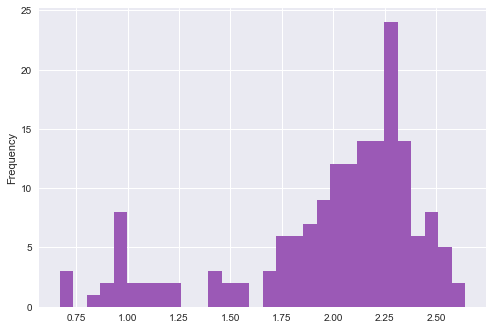

In [45]:
data_gc_true["gcMemoryReleased"].plot.hist(bins=30)

Look quite a lot like gaussian lets see.

In [27]:
f = Fitter(data_gc_true["gcMemoryReleased"].tolist())
f.fit()

KeyError: 'gcMemoryReleased'

In [ ]:
f.summary()

### Distribution of initial memory

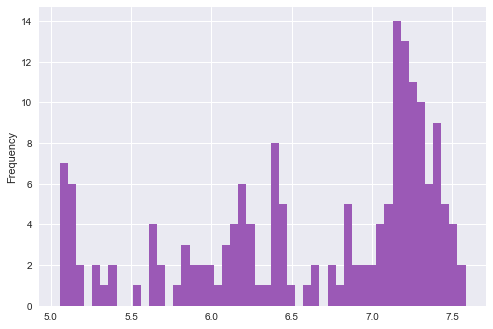

In [41]:
data_gc_true['gcInitialMemory'].plot.hist(bins=50)

In [43]:
f = Fitter(data_gc_true['gcInitialMemory'].tolist())
f.fit()

Fitted alpha distribution with error=22.752004597)
Fitted anglit distribution with error=22.5572331326)
Fitted arcsine distribution with error=23.5004409594)
Fitted beta distribution with error=27.9895524594)
Fitted betaprime distribution with error=22.2649613905)
Fitted bradford distribution with error=23.9719366672)
Fitted burr distribution with error=15.4280013077)
Fitted burr12 distribution with error=19.8104159648)
Fitted cauchy distribution with error=19.0203545712)
Fitted chi distribution with error=22.1726792437)
Fitted chi2 distribution with error=26.2893085052)
Fitted cosine distribution with error=22.3652870763)
Fitted dgamma distribution with error=17.7934053301)
Fitted dweibull distribution with error=18.1829948947)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.3500000000000005.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.2333333333333343.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.3500000000000014.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.8055555555555562.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distributio

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(254.33089639043675).
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:1177: RuntimeWarning: divide by zero encountered in log
  return exparg + log(0.5 * invK * erfc(-(x - invK) / sqrt(2)))


Fitted erlang distribution with error=22.4863753139)
Fitted expon distribution with error=27.5999367828)
Fitted exponnorm distribution with error=22.129562147)
Fitted exponpow distribution with error=47.2160724566)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:1226: RuntimeWarning: invalid value encountered in add
  negxc + special.xlogy(c - 1.0, x))


Fitted exponweib distribution with error=26.4428186147)
Fitted f distribution with error=22.1688091737)
Fitted fatiguelife distribution with error=22.1532005895)
Fitted fisk distribution with error=22.0158264781)
Fitted foldcauchy distribution with error=18.3534959065)
Fitted foldnorm distribution with error=21.9025958571)
Fitted frechet_l distribution with error=16.8345447545)
Fitted frechet_r distribution with error=19.7866125873)
Fitted gamma distribution with error=22.3415744897)
Fitted gausshyper distribution with error=18.8828160592)
Fitted genexpon distribution with error=24.6716307267)
Fitted genextreme distribution with error=16.8345656364)
Fitted gengamma distribution with error=22.3268983282)
Fitted genhalflogistic distribution with error=17.3484937074)
Fitted genlogistic distribution with error=15.0911435987)
Fitted gennorm distribution with error=20.7914769287)
Fitted genpareto distribution with error=26.7809641687)
Fitted gilbrat distribution with error=27.9069806741)
Fit

/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1608: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


Fitted ncf distribution with error=21.9691578731)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3884: RuntimeWarning: overflow encountered in multiply
  trm1 /= asarray(fac1*special.gamma((n+1)/2))
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3886: RuntimeWarning: overflow encountered in multiply
  trm2 /= asarray(sqrt(fac1)*special.gamma(n/2+1))


Fitted nct distribution with error=22.275577601)
Fitted ncx2 distribution with error=28.9580751839)
Fitted norm distribution with error=22.1323910885)
Fitted pareto distribution with error=29.0152411127)
Fitted pearson3 distribution with error=16.4730133815)
Fitted powerlaw distribution with error=20.2067286614)
Fitted powerlognorm distribution with error=20.683846402)
Fitted powernorm distribution with error=20.1501460383)
Fitted rayleigh distribution with error=23.8374373251)
Fitted rdist distribution with error=23.1104469088)
Fitted recipinvgauss distribution with error=22.3147604056)
Fitted reciprocal distribution with error=36.4368506355)
Fitted rice distribution with error=22.2851809196)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=22.6119521922)
Fitted skewnorm distribution with error=22.1323874814)
Fitted t distribution with error=22.1320854706)
Fitted trapz distribution with error=18.0810516534)
Fitted triang dist

{'genlogistic': (0.044420032509382298,
  7.4767761583944861,
  0.037450571017435125)}

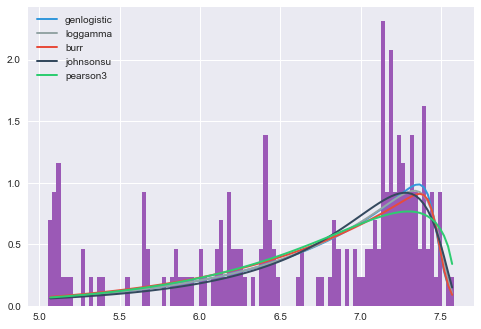

In [49]:
f.summary()
f.get_best()

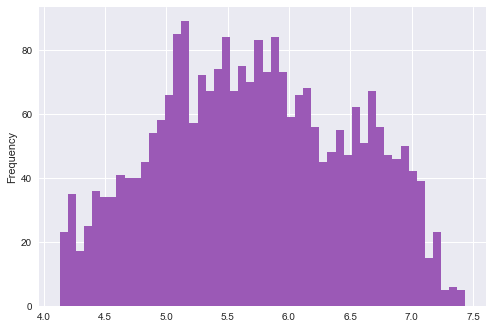

In [46]:
data_gc_false['initialUsedMemory'].plot.hist(bins=50)

### Fit model for memory addition after gc is run

In [35]:
data_gc_true["gcMemoryPostAddition"] = data_gc_true["finalUsedMemory"] - data_gc_true['gcFinalMemory']

f = Fitter(data_gc_true["gcMemoryPostAddition"] )
f.fit()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Fitted alpha distribution with error=95.2940948229)
Fitted anglit distribution with error=485.541110185)
Fitted arcsine distribution with error=365.609007035)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)
/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitted beta distribution with error=74.3793824941)
Fitted betaprime distribution with error=64.5319051814)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:557: RuntimeWarning: divide by zero encountered in true_divide
  return where(b > 1, a/(b-1.0), inf)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:559: RuntimeWarning: divide by zero encountered in true_divide
  return where(b > 2, a*(a+1.0)/((b-2.0)*(b-1.0)), inf)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1033: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted bradford distribution with error=366.823497653)
Fitted burr distribution with error=62.7255487604)
Fitted burr12 distribution with error=64.820077489)
Fitted cauchy distribution with error=168.8143922)
Fitted chi distribution with error=115.743839896)
Fitted chi2 distribution with error=73.4938488305)
Fitted cosine distribution with error=626.29776121)
Fitted dgamma distribution with error=329.018223121)
Fitted dweibull distribution with error=223.673643162)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00041666666666666664.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the er

/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.45149540646398512.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.45149541171931884.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.45149540492152462.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.45149540519342712.
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distrib

Fitted erlang distribution with error=153.565884055)
Fitted expon distribution with error=81.7855089933)
Fitted exponnorm distribution with error=81.1481727691)
Fitted exponpow distribution with error=145.231194119)
Fitted exponweib distribution with error=66.7918894364)
Fitted f distribution with error=64.5318011784)
Fitted fatiguelife distribution with error=79.0668128941)
Fitted fisk distribution with error=75.0184729269)
Fitted foldcauchy distribution with error=67.7795626533)
Fitted foldnorm distribution with error=212.958403991)
Fitted frechet_l distribution with error=195.05139078)
Fitted frechet_r distribution with error=73.5042342286)
Fitted gamma distribution with error=74.3597166483)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:2561: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=137.419315859)
Fitted genexpon distribution with error=81.826106885)
Fitted genextreme distribution with error=91.053695946)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:1869: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:1874: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))
/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1608: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted gengamma distribution with error=67.631251822)
Fitted genhalflogistic distribution with error=140.397807054)
Fitted genlogistic distribution with error=197.284625074)
Fitted gennorm distribution with error=163.379577772)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:1732: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genpareto distribution with error=65.0075953372)
Fitted gilbrat distribution with error=82.7974433286)
Fitted gompertz distribution with error=98.8275563136)
Fitted gumbel_l distribution with error=442.976900316)
Fitted gumbel_r distribution with error=197.7878679)
Fitted halfcauchy distribution with error=66.4633423155)
Fitted halfgennorm distribution with error=153.486731015)
Fitted halflogistic distribution with error=133.461132576)
Fitted halfnorm distribution with error=211.595127878)
Fitted hypsecant distribution with error=228.873355848)
Fitted invgamma distribution with error=89.3607635069)
Fitted invgauss distribution with error=82.4410770974)
Fitted invweibull distribution with error=91.050301217)
Fitted johnsonsb distribution with error=73.6954621881)
Fitted johnsonsu distribution with error=76.3717791962)
Fitted kappa3 distribution with error=63.5383844064)
Fitted kappa4 distribution with error=363.089438377)


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:46: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - special.smirnov(n, x)


Fitted ksone distribution with error=504.62345722)
Fitted kstwobign distribution with error=244.207722396)
Fitted laplace distribution with error=211.062567188)
Fitted levy distribution with error=119.383625682)
Fitted levy_l distribution with error=581.332102987)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=348.587707605)
Fitted logistic distribution with error=256.413802963)
Fitted loglaplace distribution with error=75.8349951856)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3131: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3122: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Fitted lognorm distribution with error=76.4028114247)
Fitted lomax distribution with error=64.997374602)
Fitted maxwell distribution with error=302.113383544)


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3325: RuntimeWarning: divide by zero encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:3658: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/gam(nu)*(x**(2*nu-1.0))*exp(-nu*x*x)


Fitted mielke distribution with error=63.5910630152)
Fitted nakagami distribution with error=109.595366125)
Fitted ncf distribution with error=71.182186213)
Fitted nct distribution with error=92.7388290627)
Fitted ncx2 distribution with error=79.8968125359)
Fitted norm distribution with error=342.81101349)
Fitted pareto distribution with error=76.4731628939)
Fitted pearson3 distribution with error=73.1618232969)
Fitted powerlaw distribution with error=198.458216771)
Fitted powerlognorm distribution with error=67.3130720063)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4285: RuntimeWarning: divide by zero encountered in power
  return (c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0)))
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4285: RuntimeWarning: invalid value encountered in multiply
  return (c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0)))
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4319: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / special.beta(0.5, c / 2.0)


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=291.737337173)
Fitted rdist distribution with error=396.392977454)
Fitted recipinvgauss distribution with error=72.0904396961)
Fitted reciprocal distribution with error=727.912620642)
Fitted rice distribution with error=291.697129515)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=507.638072073)
Fitted skewnorm distribution with error=212.963041931)
Fitted t distribution with error=166.163962398)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4654: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4703: RuntimeWarning: divide by zero encountered in true_divide
  return where(x < c, 2*x/c, 2*(1-x)/(1-c))


Fitted trapz distribution with error=651.764715521)
Fitted triang distribution with error=385.016779605)
Fitted truncexpon distribution with error=391.506542388)


/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4805: RuntimeWarning: divide by zero encountered in log
  self._logdelta = log(self._delta)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4805: RuntimeWarning: invalid value encountered in log
  self._logdelta = log(self._delta)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_continuous_distns.py:4863: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (asarray(1-Fx))**(lam-1.0)


Fitted truncnorm distribution with error=626.29776121)
Fitted tukeylambda distribution with error=166.464404174)
Fitted uniform distribution with error=504.699865517)
Fitted vonmises distribution with error=3.16574814645e+52)
Fitted vonmises_line distribution with error=626.29776121)
Fitted wald distribution with error=87.3477641023)
Fitted weibull_max distribution with error=195.05139078)
Fitted weibull_min distribution with error=73.5042342286)
Fitted wrapcauchy distribution with error=nan)


/usr/local/lib/python2.7/dist-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error
burr,62.725549
kappa3,63.538384
mielke,63.591063
f,64.531801
betaprime,64.531905


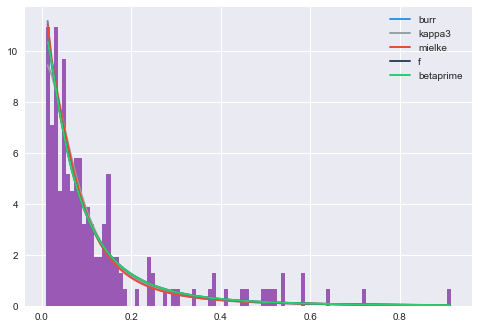

In [36]:
f.summary()